In [1]:
%matplotlib widget

import logging
import httpx
import matplotlib.pyplot as plt
import pyproj
import shapely
import sqlmodel

from arpav_ppcv import (
    config,
    database,
    db,
    timeseries,
)
from arpav_ppcv.schemas import static

logging.basicConfig(level=logging.DEBUG)
logging.getLogger("httpx").setLevel(logging.WARNING)
logging.getLogger("httpcore").setLevel(logging.WARNING)
logging.getLogger("matplotlib.pyplot").setLevel(logging.WARNING)

location = shapely.Point(11.4134, 45.7684)
client = httpx.Client()
settings = config.get_settings()
settings.verbose_db_logs = False
session = sqlmodel.Session(
    db.get_engine(settings)
)


hcc1 = db.get_historical_coverage_configuration_by_identifier(
    session, 
    # "historical-tas-anomaly-annual-arpa_v-climate_standard_normal_1991_2020",
    "historical-tas-absolute-annual-arpa_v",
)
print(hcc1.identifier if hcc1 is not None else "NOT FOUND")

historical-tas-absolute-annual-arpa_v


In [2]:
covs = db.generate_historical_coverages_from_configuration(hcc1)
print("\n".join(c.identifier for c in covs))

historical-tas-absolute-annual-arpa_v-all_year
historical-tas-absolute-annual-arpa_v-winter
historical-tas-absolute-annual-arpa_v-spring
historical-tas-absolute-annual-arpa_v-summer
historical-tas-absolute-annual-arpa_v-autumn
historical-tas-absolute-annual-arpa_v-january
historical-tas-absolute-annual-arpa_v-february
historical-tas-absolute-annual-arpa_v-march
historical-tas-absolute-annual-arpa_v-april
historical-tas-absolute-annual-arpa_v-may
historical-tas-absolute-annual-arpa_v-june
historical-tas-absolute-annual-arpa_v-july
historical-tas-absolute-annual-arpa_v-august
historical-tas-absolute-annual-arpa_v-september
historical-tas-absolute-annual-arpa_v-october
historical-tas-absolute-annual-arpa_v-november
historical-tas-absolute-annual-arpa_v-december


In [4]:
cov1 = covs[13]
print(f"{cov1.get_netcdf_main_dataset_name()=}")
print(f"{cov1.get_thredds_ncss_url(settings.thredds_server)=}")

DEBUG:arpav_ppcv.thredds.crawler:THREDDS dataset url (cline_yr/TDd_M09_????-????_py85.nc) is an fnmatch pattern, retrieving the actual URL from the server...
DEBUG:arpav_ppcv.thredds.crawler:contacting THREDDS server in order to look for dataset URL fragment...


cov1.get_netcdf_main_dataset_name()='TDd'
cov1.get_thredds_ncss_url(settings.thredds_server)='http://thredds:8080/thredds/ncss/grid/cline_yr/TDd_M09_1992-2024_py85.nc'


In [5]:
all_series = timeseries.get_historical_coverage_time_series(
    settings=settings,
    http_client=client,
    coverage=cov1,
    point_geom=location,
    temporal_range=(None, None),
    processing_methods=[
        static.CoverageTimeSeriesProcessingMethod.NO_PROCESSING,
        static.CoverageTimeSeriesProcessingMethod.MOVING_AVERAGE_11_YEARS,
    ]
)
print("\n".join(s.identifier for s in all_series))

DEBUG:arpav_ppcv.thredds.crawler:THREDDS dataset url (cline_yr/TDd_M09_????-????_py85.nc) is an fnmatch pattern, retrieving the actual URL from the server...
DEBUG:arpav_ppcv.thredds.crawler:contacting THREDDS server in order to look for dataset URL fragment...


historical-tas-absolute-annual-arpa_v-september-main-t408cmxxc5bw-no_processing
historical-tas-absolute-annual-arpa_v-september-main-t408cmxxc5bw-moving_average_11_years


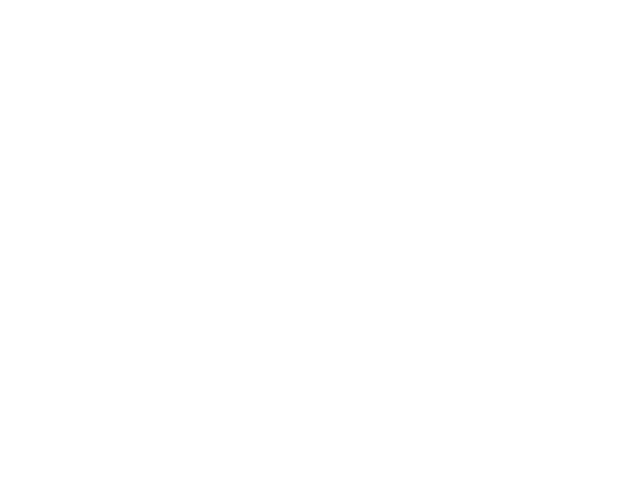

In [6]:
fig = plt.figure()

In [7]:
for pd_series in all_series:
    pd_series.data_.plot()
plt.legend()

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/appuser/.cache/pypoetry/virtualenvs/arpav-ppcv-backend-f8CPI8sp-py3.10/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/appuser/.cache/pypoetry/virtualenvs/arpav-ppcv-backend-f8CPI8sp-py3.10/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/appuser/.cache/pypoetry/virtualenvs/arpav-ppcv-backend-f8CPI8sp-py3.10/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUn